In [ ]:
import networkx as nx
import numpy as np
import scipy as sp
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities
from community import community_louvain
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [ ]:
G0 = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)
print(f"number of nodes in original dataset: ", len(G0.nodes))

#removing the prefix in proteins
protein_info = pd.read_csv("Protein_info.txt", sep='\t')
map_dic = protein_info.set_index('#string_protein_id').to_dict()['preferred_name']
   
G = nx.relabel_nodes(G0, map_dic)

# remove essential proteins
essential_proteins = pd.read_csv("yeast essential proteins.csv", header=None)[1]
print()
print(essential_proteins)
G.remove_nodes_from(essential_proteins)
print(f"number of nodes after removing essential proteins: ", len(G.nodes))  

# delete those edges with a combined score of <= threshold_score (small confidence)
threshold_score = 500
for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G.remove_edge(edge[0],edge[1])

number of nodes in original dataset:  6394

0         YAL001C
1         YAL003W
2         YAL012W
3         YAL025C
4         YAL032C
          ...    
1308    YKL138C-A
1309    YNL138W-A
1310    YNL024C-A
1311    YHR199C-A
1312    YIL102C-A
Name: 1, Length: 1313, dtype: object
number of nodes after removing essential proteins:  6324


## Louvain and Centrality Measures

In [6]:
partLouvain = community_louvain.best_partition(G)
number_of_communities = max(partLouvain.values())+1 #We add one because the indexing starts at 0.
communities = {} #empty dictionary
for i in range(number_of_communities):
    communities[i] = [] #create an empty list for each community

for name, community in partLouvain.items():
    communities[community].append(name) #go through the computed partition and add each node to the appropriate list


In [7]:
protein_interest = ['PDA1', 'PDB1', 'LAT1', 'LPD1', 'PKP1', 'PKP2', 'PTC5']
communities_interest = set()

for p in protein_interest:
    print(f"protein {p} in community {partLouvain[p]}")
    communities_interest.add(partLouvain[p])

#PDA1, PDB1, LAT1, LPD1, 
#PKP1, PKP2,PTC5



protein PDA1 in community 2
protein PDB1 in community 2
protein LAT1 in community 2
protein LPD1 in community 2
protein PKP1 in community 7
protein PKP2 in community 7
protein PTC5 in community 7


Below is a code to obtain a subset of G with only community 2 and 7

In [8]:
G_PDH = G.subgraph(communities[list(communities_interest)[0]]) #subgraph of community with PDH Complex
G_enz = G.subgraph(communities[list(communities_interest)[1]]) #subgraph of community with phosphatase and kinase

The code below finds the 10 nodes with the highest centrality measure within the PDH complex community

Text(0.5, 1.0, 'PDH complex')

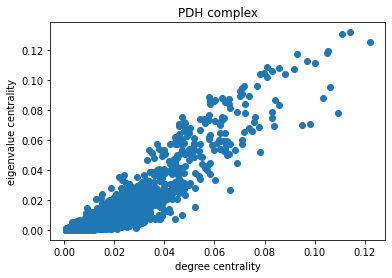

In [17]:
PDH_degree = nx.degree_centrality(G_PDH)
PDH_eigen = nx.eigenvector_centrality(G_PDH)
x = []
y = []
for key, val in PDH_degree.items():
    x.append(val)
    y.append(PDH_eigen[key])
plt.plot(x, y, 'o')
plt.xlabel('degree centrality')
plt.ylabel('eigenvalue centrality')
plt.title('PDH complex')

Text(0.5, 1.0, 'Phosphatase and kinase')

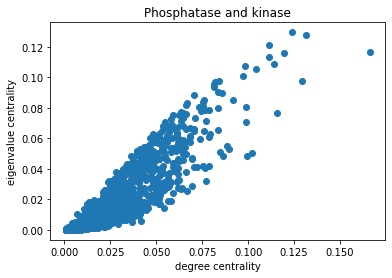

In [19]:
enz_degree = nx.degree_centrality(G_enz)
enz_eigen = nx.eigenvector_centrality(G_enz)
x = []
y = []
for key, val in enz_degree.items():
    x.append(val)
    y.append(enz_eigen[key])
plt.plot(x, y, 'o')
plt.xlabel('degree centrality')
plt.ylabel('eigenvalue centrality')
plt.title('Phosphatase and kinase')